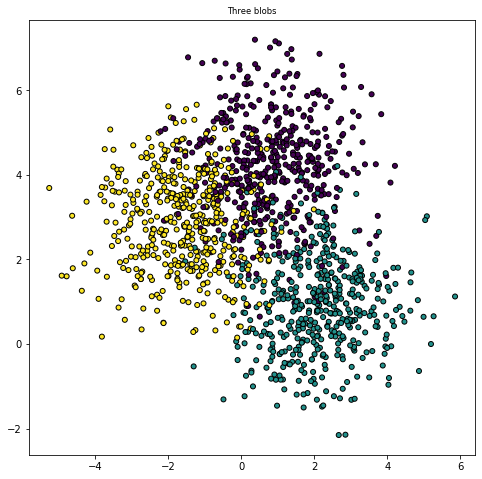

In [78]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt


n_samples = 1400
random_state = 0
cluster_std= 1.2
X, y_true = make_blobs(centers=3, n_samples=n_samples, cluster_std=cluster_std, random_state=random_state)

plt.figure(figsize=(8,8))
plt.title("Three blobs", fontsize="small")
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y_true, s=25, edgecolor="k")
plt.show()

In [79]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, n_init=1, init='k-means++', algorithm='full')
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [80]:
from sklearn.metrics import silhouette_score
#Calculating the silhouette score:
print(f'Silhouette Score(n=2): {silhouette_score(X, y_kmeans)}')

Silhouette Score(n=2): 0.4322521381346902


In [85]:
from sklearn.metrics import adjusted_mutual_info_score
#To calculate the adjusted Rand Index:
adjusted_mutual_info_score(y_true, y_kmeans, average_method='arithmetic')

0.5669362592504267

In [81]:
from sklearn.metrics import rand_score
#To calculate the Rand Index:
rand_score(y_true, y_kmeans)

0.8401868681711426

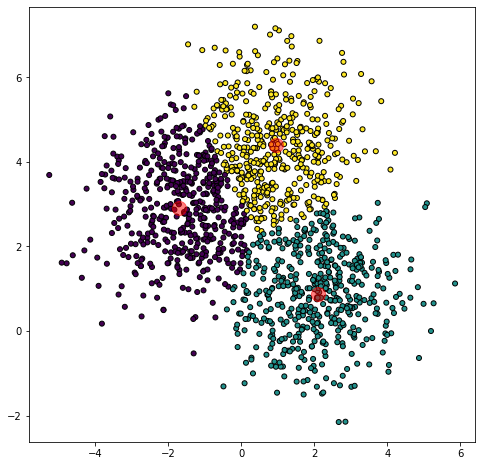

In [82]:
#Plot the predicted classes
plt.figure(figsize=(8,8))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, marker="o", s=25, edgecolor="k")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

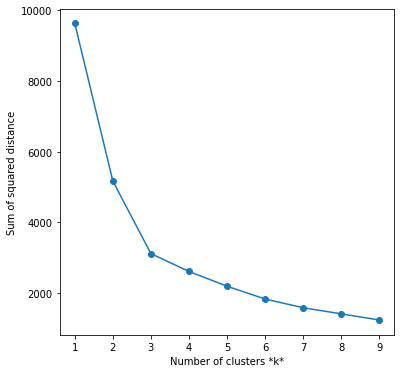

In [83]:
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');